<a href="https://colab.research.google.com/github/lukasakar19-byte/Analisis-Regresi/blob/main/TugasMg4_AnReg_2330209040016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas 1

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv("/content/gdrive/My Drive/Data/admission.csv")
data.info()
variabel_x = data[["gre_score","toefl_score","motiv_letter_strength","recommendation_strength","gpa","research_exp"]]
variabel_y = data['admission_score']

print("Data Variabel X:", variabel_x)
print("Data Variabel Y:", variabel_y)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gre_score                500 non-null    int64  
 1   toefl_score              500 non-null    int64  
 2   univ_ranking             500 non-null    int64  
 3   motiv_letter_strength    500 non-null    float64
 4   recommendation_strength  500 non-null    float64
 5   gpa                      500 non-null    float64
 6   research_exp             500 non-null    int64  
 7   admission_score          500 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 31.4 KB
Data Variabel X:      gre_score  toefl_score  motiv_letter_strength  recommendation_strength  \
0          337          118                    4.5                      4.5   

In [29]:
from scipy.stats import pearsonr

for column_name in variabel_x.columns:
    current_x = variabel_x[column_name]
    korelasi_pearson, p_value = pearsonr(current_x, variabel_y)
    print(f"\nKoefisien Korelasi Pearson antara {column_name} dan Variabel Y: {korelasi_pearson:.3f}")

    if korelasi_pearson > 0.8:
        interpretasi = "Korelasi sangat kuat positif"
    elif korelasi_pearson > 0.6:
        interpretasi = "Korelasi kuat positif"
    elif korelasi_pearson > 0.4:
        interpretasi = "Korelasi sedang positif"
    elif korelasi_pearson > 0.2:
        interpretasi = "Korelasi lemah positif"
    elif korelasi_pearson > 0:
        interpretasi = "Korelasi sangat lemah positif"
    elif korelasi_pearson < -0.8:
        interpretasi = "Korelasi sangat kuat negatif"
    elif korelasi_pearson < -0.6:
        interpretasi = "Korelasi kuat negatif"
    elif korelasi_pearson < -0.4:
        interpretasi = "Korelasi sedang negatif"
    elif korelasi_pearson < -0.2:
        interpretasi = "Korelasi lemah negatif"
    elif korelasi_pearson < 0:
        interpretasi = "Korelasi sangat lemah negatif"
    else:
        interpretasi = "Tidak ada korelasi linier (atau sangat mendekati nol)"

    print(f"Interpretasi: {interpretasi}")


Koefisien Korelasi Pearson antara gre_score dan Variabel Y: 0.810
Interpretasi: Korelasi sangat kuat positif

Koefisien Korelasi Pearson antara toefl_score dan Variabel Y: 0.792
Interpretasi: Korelasi kuat positif

Koefisien Korelasi Pearson antara motiv_letter_strength dan Variabel Y: 0.685
Interpretasi: Korelasi kuat positif

Koefisien Korelasi Pearson antara recommendation_strength dan Variabel Y: 0.645
Interpretasi: Korelasi kuat positif

Koefisien Korelasi Pearson antara gpa dan Variabel Y: 0.883
Interpretasi: Korelasi sangat kuat positif

Koefisien Korelasi Pearson antara research_exp dan Variabel Y: 0.546
Interpretasi: Korelasi sedang positif


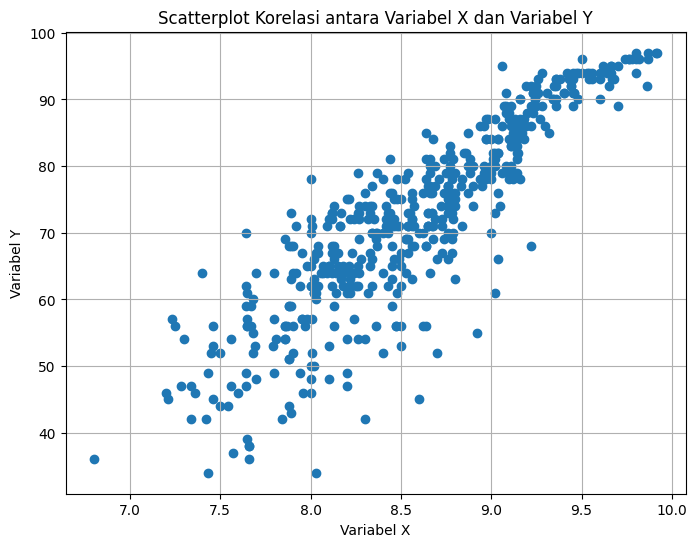

In [30]:
# Buat scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(variabel_x["gpa"], variabel_y)
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.title('Scatterplot Korelasi antara Variabel X dan Variabel Y')
plt.grid(True)
# Tampilkan plot
plt.show()

In [31]:
# Hitung korelasi Pearson dan p-value
korelasi_pearson, p_value = pearsonr(variabel_x["gpa"], variabel_y)

# Tingkat signifikansi
alpha = 0.05

print(f"Koefisien Korelasi Pearson: {korelasi_pearson:.3f}")
print(f"P-value: {p_value:.5f}")
print(f"Tingkat Signifikansi (alpha): {alpha}")

# Uji hipotesis
if p_value < alpha:
    keputusan = "Tolak Hipotesis Nol (H0)"
    interpretasi_uji = "Ada hubungan linier yang signifikan antara GPA dan Admission Score."
else:
    keputusan = "Gagal Menolak Hipotesis Nol (H0)"
    interpretasi_uji = "Tidak ada hubungan linier yang signifikan antara GPA dan Admission Score."

print(f"\nKeputusan: {keputusan}")
print(f"Interpretasi Uji: {interpretasi_uji}")

Koefisien Korelasi Pearson: 0.883
P-value: 0.00000
Tingkat Signifikansi (alpha): 0.05

Keputusan: Tolak Hipotesis Nol (H0)
Interpretasi Uji: Ada hubungan linier yang signifikan antara GPA dan Admission Score.


# Tugas 2

In [32]:
data.info
variabel_x = data["gre_score"]
variabel_y = data['admission_score']

print("Data Variabel X:", variabel_x)
print("Data Variabel Y:", variabel_y)

Data Variabel X: 0      337
1      324
2      316
3      322
4      314
      ... 
495    332
496    337
497    330
498    312
499    327
Name: gre_score, Length: 500, dtype: int64
Data Variabel Y: 0      92
1      76
2      72
3      80
4      65
       ..
495    87
496    96
497    93
498    73
499    84
Name: admission_score, Length: 500, dtype: int64


In [33]:
from scipy.stats import pearsonr

column_name = 'gre_score'
korelasi_pearson, p_value = pearsonr(variabel_x, variabel_y)
print(f"\nKoefisien Korelasi Pearson antara {column_name} dan Variabel Y: {korelasi_pearson:.3f}")


Koefisien Korelasi Pearson antara gre_score dan Variabel Y: 0.810


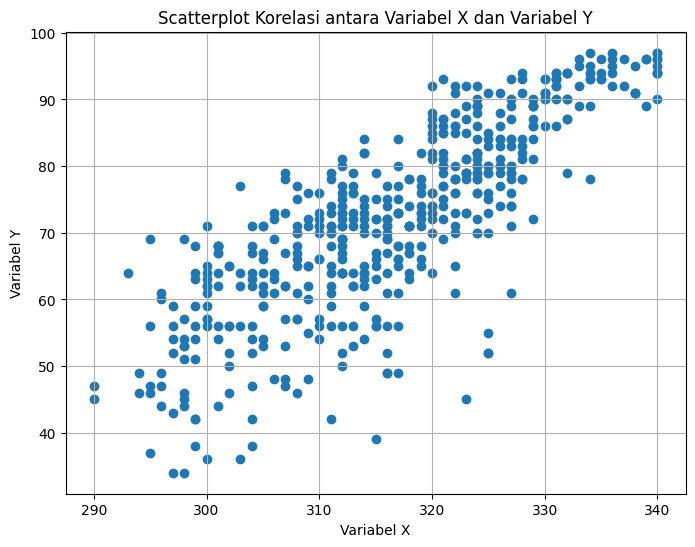

In [34]:
# Buat scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(variabel_x, variabel_y)
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.title('Scatterplot Korelasi antara Variabel X dan Variabel Y')
plt.grid(True)
# Tampilkan plot
plt.show()